In [36]:
#!pip3 install scikit-learn
#!pip3 install pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#!pip3 show scikit-learn
#!pip3 install imbalanced-learn
#!pip3 show imbalanced-learn
#!pip3 install tensorflow
#!pip3 show tensorflow

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import tensorflow as tf

## Dataset Source:
Bock, R. (2004). MAGIC Gamma Telescope [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.



In [37]:
cols = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
# to label columns 
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [38]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [39]:
# to convert g to 1 and h to 0 using equality condition
df['class'] = (df['class'] == 'g').astype(int)

In [40]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

### Classification Problem
each of these record is a data point in our dataframe. Each of the columns are properties or features of the record. 
Goal of the project: to classify future records or observations into 'g' or '1' for gamma and 'h' or '0' for Hadron radiation

Therefore, this is a classification problem.
Here are 10 features fLength to fDist that I pass into a model and predict the class label. Here true label '1' is 'g' or Gamma. 

So this is Supervised Learning!

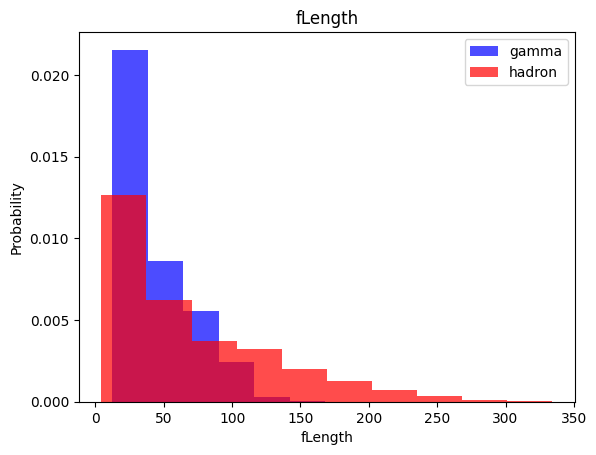

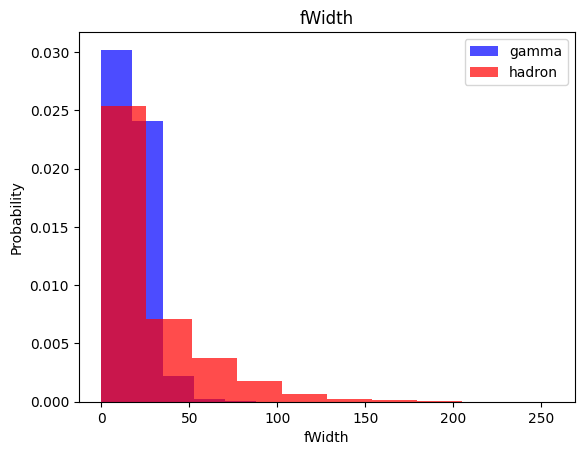

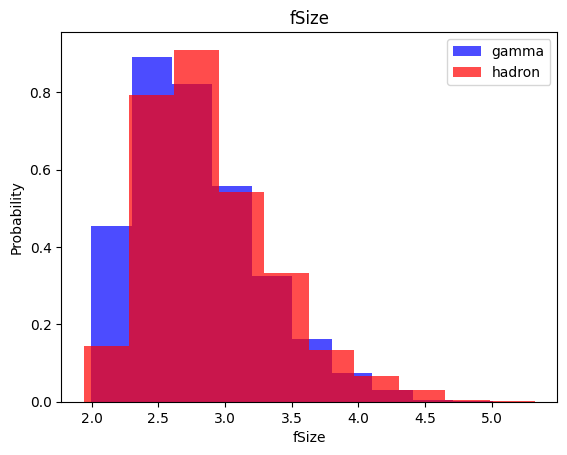

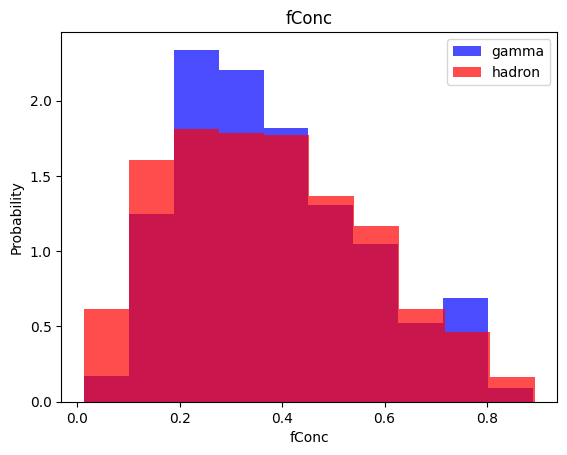

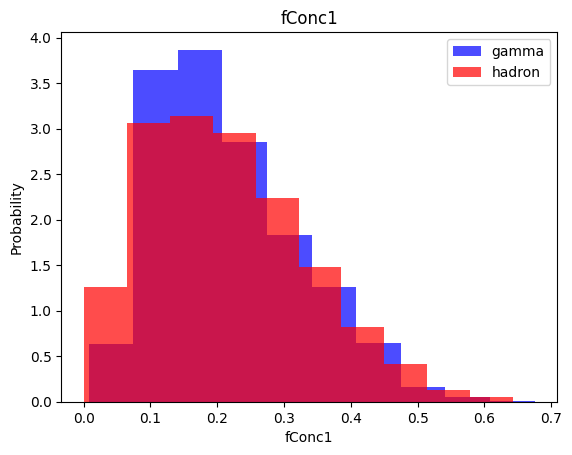

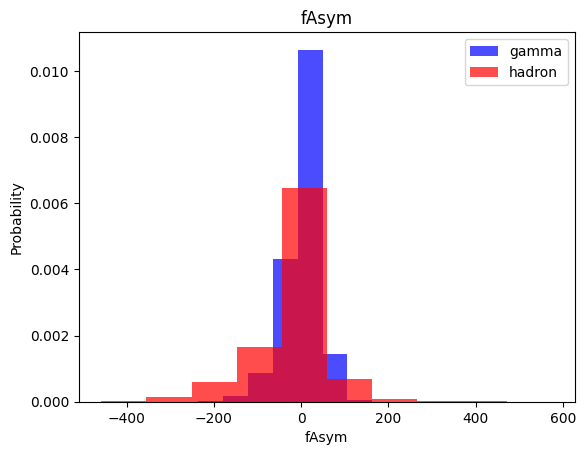

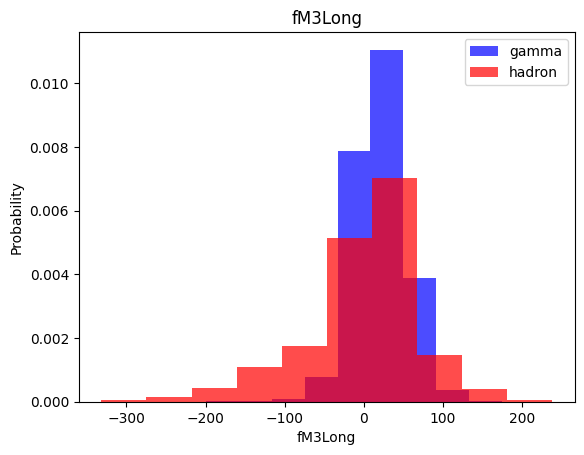

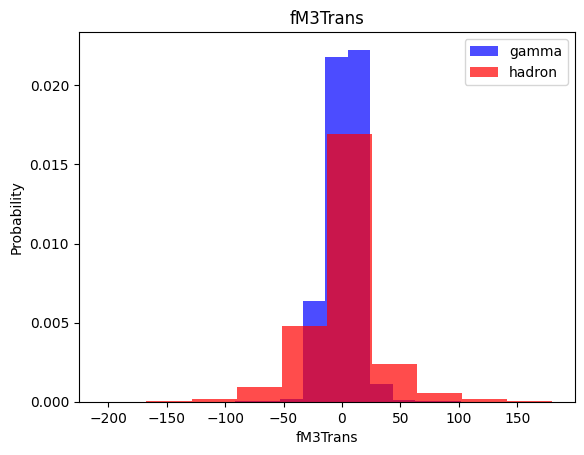

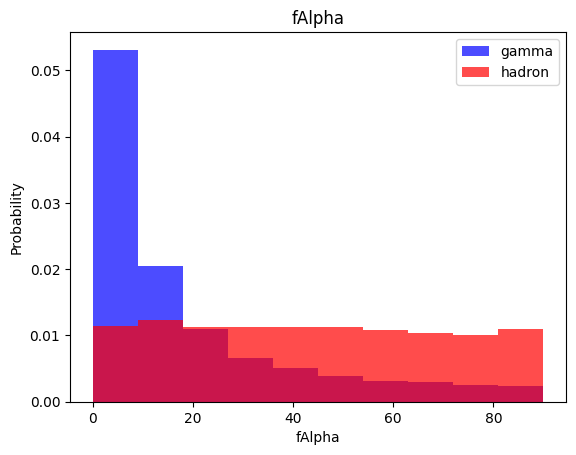

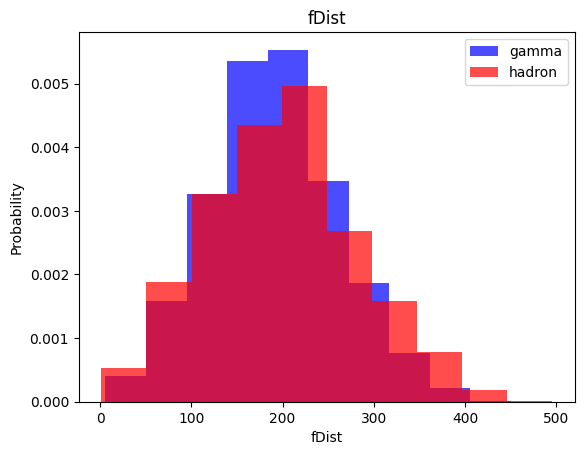

In [41]:
# picking all cols except last (i.e. class) as labels
for label in df.columns[:-1]:
    
    # give me everything in df where class=1 and put each label (i.e. corresp col) in histogram
    plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]== 0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")  # because its a density plot
    plt.xlabel(label)
    plt.legend()
    plt.show()

# train, validation, test datasets

In [42]:
#splitting df into train, valid, test
#numpy to split the dataset
# sample() shuffles data randomly
# 60% : train; 20%: validation; 20%: test 
# (0.6 * len(df)) :- first 60% - training data
# (o.8*len(df)) :- next 20% - validation data
# which leaves 20% for testing
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [43]:
# Scaling the features 
def scale_dataset(dataframe, oversample = False):
    X = dataframe[dataframe.columns[:-1]].values  #labels (i.e. all cols except class)
    y = dataframe[dataframe.columns[-1]].values  #target (i.e. class)
    
    scaler = StandardScaler()
    # fit and transform x
    X = scaler.fit_transform(X)  # take x and fit the standard scaler to x and transform all the values
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X,y)  # take the less class and increase the dataset to match the greater class

    # convert data into a huge 2D numpy array
        # using hstack: stack 2 arrays horizontally (column wise) i.e. side by side 
    
    data = np.hstack((X, np.reshape(y, (-1,1))))  
    #here X is 2D array, y is 1D vector;
    # so reshape y into 2D using np.reshape(); here -1 means len(y) i.e. whatever the dimension of the variable is
    
    return data, X, y

     

In [44]:
print(len(train[train['class']==1]))  # gamma
print(len(train[train['class']==0]))  # hadron

7384
4028


## Oversampling 

The distribution of the two classes is not equal 
so we want to oversample the 'hadron' samples to match the 'gamma's' size

for this import:

**from impblean.over_sampling import RandomOverSampler**


In [45]:
# Oversampling training dataset
train, X_train, y_train =  scale_dataset(train, oversample=True)

In [46]:
len(y_train)

14768

In [47]:
sum(y_train == 1)

np.int64(7384)

In [48]:
sum(y_train == 0)

np.int64(7384)

## Scaling validation and test datasets without Oversampling
? because they are considered random data that evaluate the performance of the trained model. therefore, don't need oversampling.

In [49]:
valid, X_valid, y_valid = scale_dataset(valid, oversample= False)
test, X_test, y_test = scale_dataset(test, oversample= False)

# kNN (K-Nearest Neighbors) Algorithm
Using KNeighborsClassifier from sklearn.neighbors
- so import it in the first cell. 
- also, import classification report. see cell 1

In [50]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
# getting the predictions by testing on X_test set 

y_pred = knn_model.predict(X_test)

In [52]:
# predicted y label

y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [53]:
# true label value
y_test

array([0, 0, 1, ..., 1, 0, 0])

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1331
           1       0.86      0.87      0.87      2473

    accuracy                           0.82      3804
   macro avg       0.81      0.81      0.81      3804
weighted avg       0.82      0.82      0.82      3804



With kNN Model, the model performed best with k set to 5 neighbors. 
Performance:
Accuracy: 81%
Hadron Prediction (class = 0): 73%
Gamma Prediction (class = 1): 85%

Overall, the prediction of gamma class was better than hadron class. 

**Key Observations:**
Class Imbalance: Class 1 has more instances (2441) than class 0 (1363).
The model performs slightly better for the majority class (class 1) than for the minority class (class 0).

High Overall Accuracy: 81% of predictions are correct, but accuracy might not be a good metric if class imbalance is significant.

Precision vs. Recall:
For class 0: Precision > Recall (better at avoiding false positives than identifying all true positives).
For class 1: Precision ≈ Recall (balanced performance for this class).

**Recommendations:**
For Balanced Classes: The model performs reasonably well overall. Focus on improving class 0's recall to achieve better balance.
For Imbalanced Classes: Consider rebalancing the dataset using techniques like oversampling (e.g., RandomOverSampler) or undersampling, or use class-weighted models to improve performance on the minority class.

# Naive Bayes Algorithm

- Using package:
from sklearn.naive_bayes import GaussianNB

In [55]:
nb_model = GaussianNB()
# training the Naive Bayes model
nb_model = nb_model.fit(X_train, y_train)

In [56]:
# prediction

y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.42      0.52      1331
           1       0.74      0.89      0.81      2473

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



# Logistic Regression

from sklearn.linear_model import LogisiticRegression

In [57]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [58]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.71      1331
           1       0.85      0.82      0.83      2473

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



### Outcomes of Logistic Regression:
78% accuracy
f1-score of both classes are better

Overall, Logistic Regression model performed better than Naive-Bayes model but still not as good as kNN model.

# Support Vector Machines (SVM)
import the support vector classifier using the following command:

from sklearn.svm import SVC

In [59]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [60]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1331
           1       0.90      0.89      0.90      2473

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



## Outcomes:
performance is better than all 3 classification models (kNN, Naive-Bayes and Logistic Regression) with accuracy at 86% and class prediction at 80% and 90% each.

# Neural Networks
for classification

using TensorFlow:
import tensorflow as tf

In [79]:
# Defining the plot definition (standard across tf):
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))  # 1 row and 2 columns 
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    ax2.legend()

    plt.show()


In [83]:
#Defining a function - train_model
def train_model(X_train, y_train, num_nodes, dropout_rate, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),  #shape=(10,) means 10 dimensions x feature_count dimensions i.e. no. of features per timestep
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation='sigmoid')])  # we're projecting our predictions to be 0 ot 1
    
    # compile model
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

    # train and take history
    # history: Tf keeps track of the history of the epochs (training cycles)

    history = nn_model.fit(
        X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split=0.2, verbose = False
        )  #validation_split : splits a portion of the training data into validation data


    return nn_model, history
    



16 nodes, dropout_rate 0, lr 0.1, batch_size 32


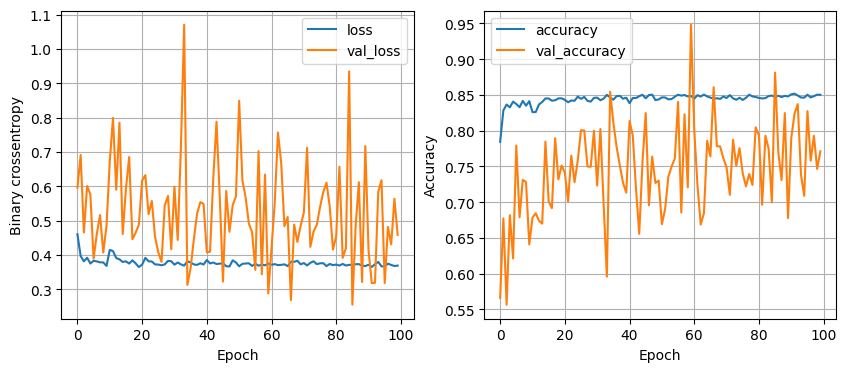

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.8441 - loss: 0.3711
16 nodes, dropout_rate 0, lr 0.1, batch_size 64


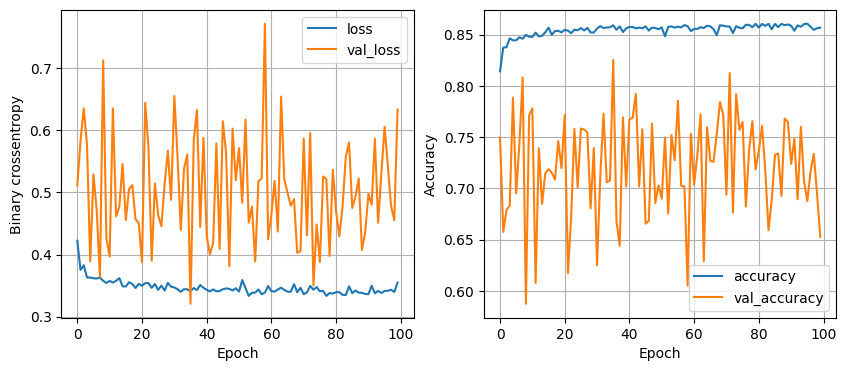

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - accuracy: 0.8497 - loss: 0.3501
16 nodes, dropout_rate 0, lr 0.1, batch_size 128


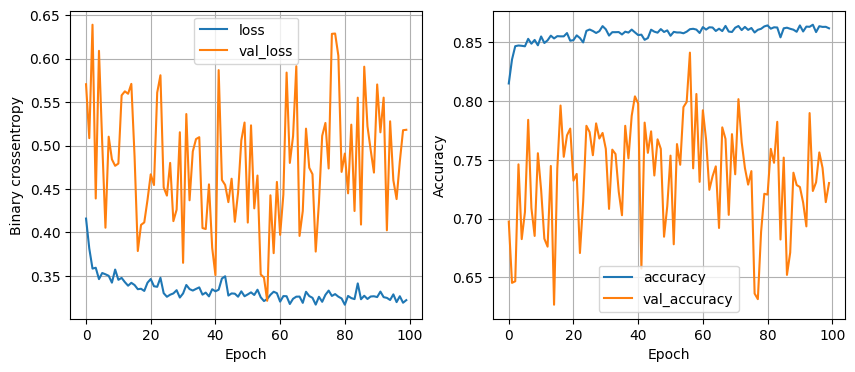

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.8642 - loss: 0.3252
16 nodes, dropout_rate 0, lr 0.005, batch_size 32


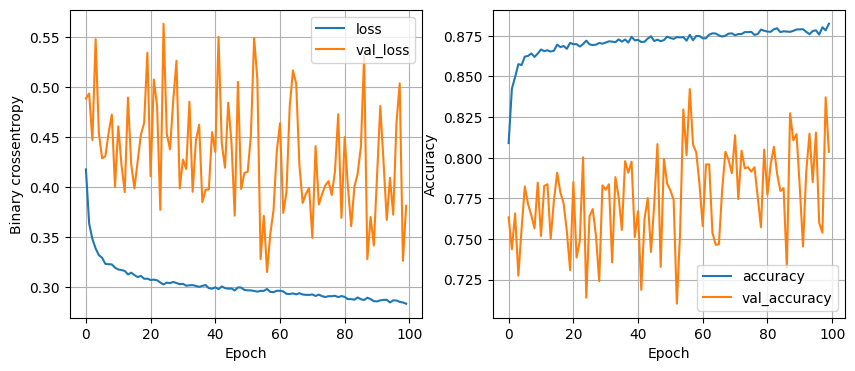

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.8705 - loss: 0.3144
16 nodes, dropout_rate 0, lr 0.005, batch_size 64


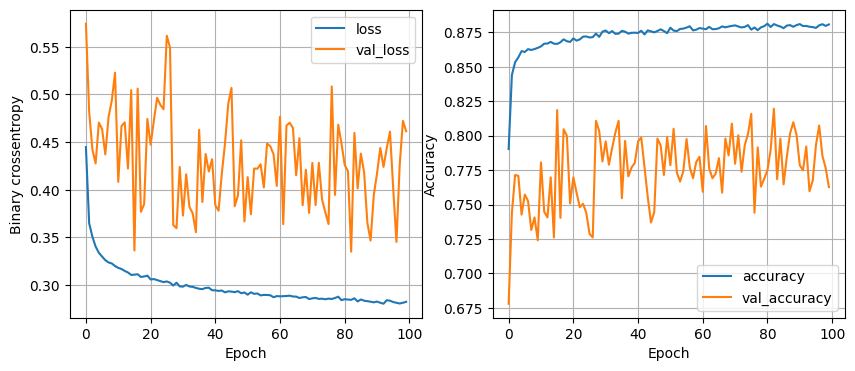

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.8686 - loss: 0.3168
16 nodes, dropout_rate 0, lr 0.005, batch_size 128


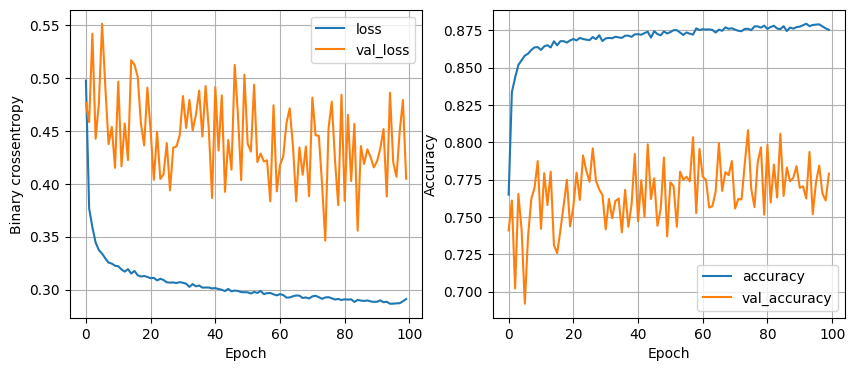

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.8764 - loss: 0.3165
16 nodes, dropout_rate 0, lr 0.001, batch_size 32


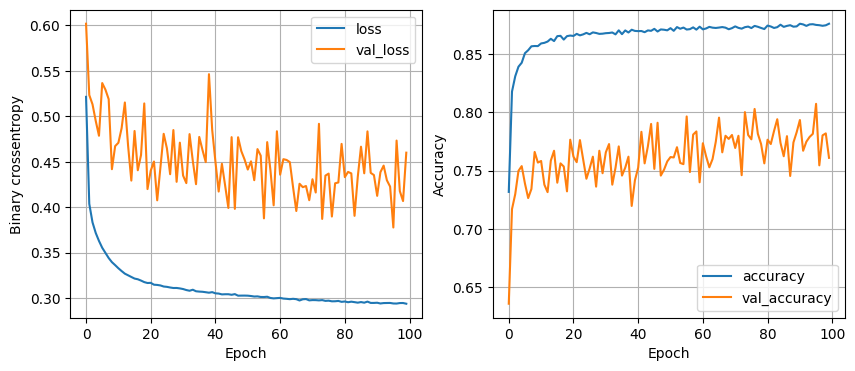

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - accuracy: 0.8685 - loss: 0.3129
16 nodes, dropout_rate 0, lr 0.001, batch_size 64


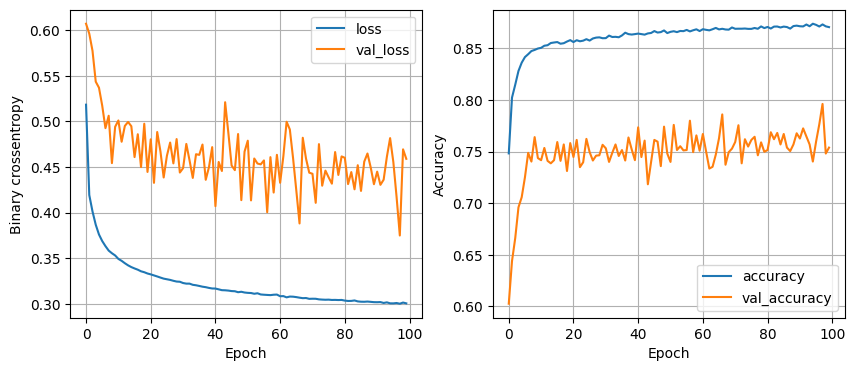

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.8667 - loss: 0.3131
16 nodes, dropout_rate 0, lr 0.001, batch_size 128


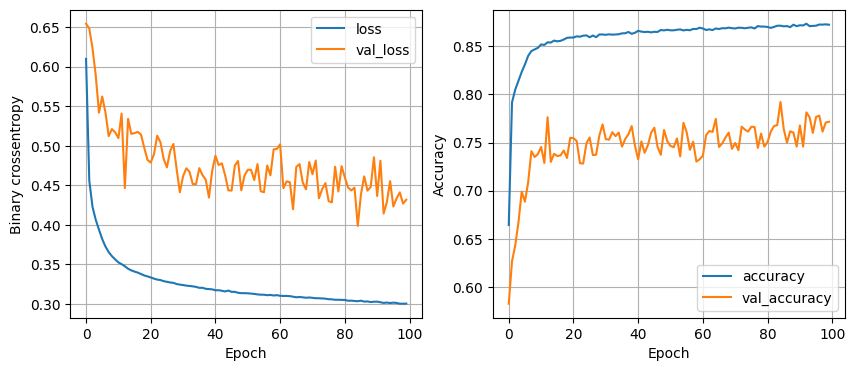

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - accuracy: 0.8700 - loss: 0.3105
16 nodes, dropout_rate 0.2, lr 0.1, batch_size 32


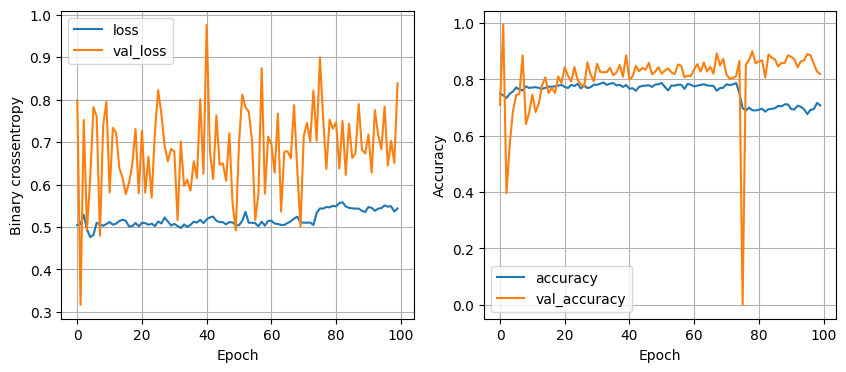

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.7986 - loss: 0.4630
16 nodes, dropout_rate 0.2, lr 0.1, batch_size 64


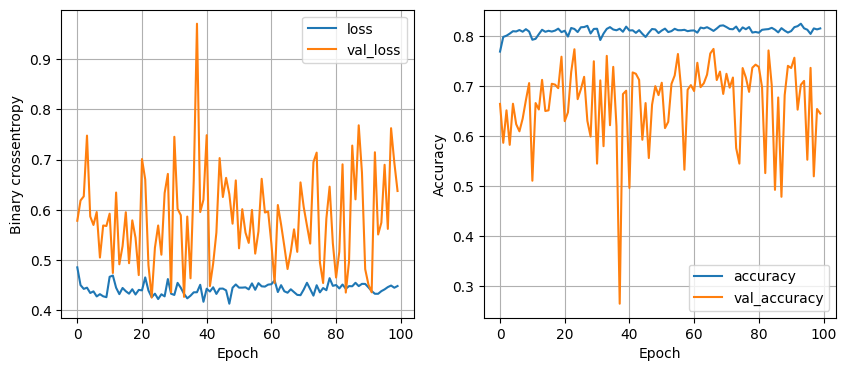

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.8425 - loss: 0.3949
16 nodes, dropout_rate 0.2, lr 0.1, batch_size 128


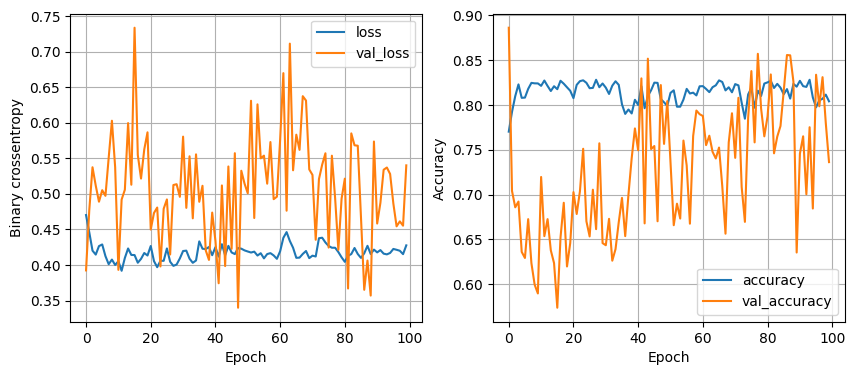

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.8561 - loss: 0.3565
16 nodes, dropout_rate 0.2, lr 0.005, batch_size 32


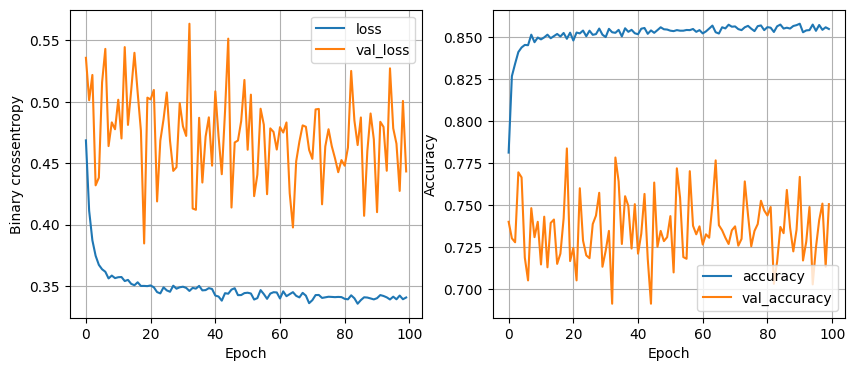

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.8634 - loss: 0.3204
16 nodes, dropout_rate 0.2, lr 0.005, batch_size 64


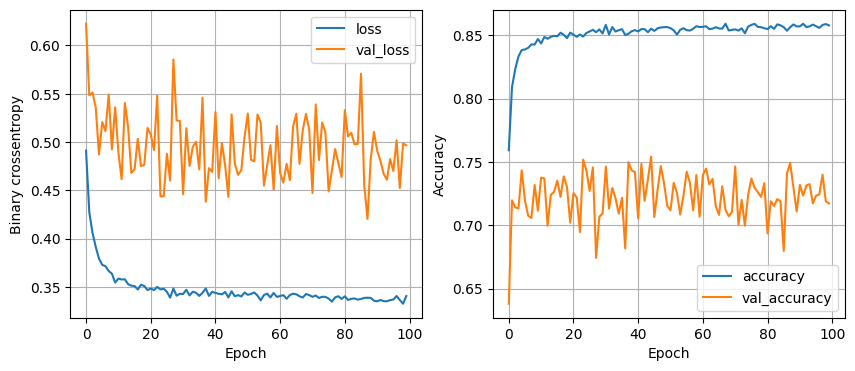

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.8701 - loss: 0.3164
16 nodes, dropout_rate 0.2, lr 0.005, batch_size 128


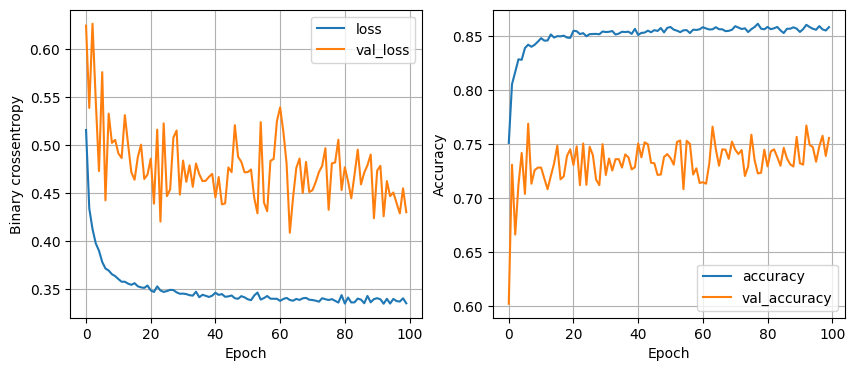

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - accuracy: 0.8646 - loss: 0.3225
16 nodes, dropout_rate 0.2, lr 0.001, batch_size 32


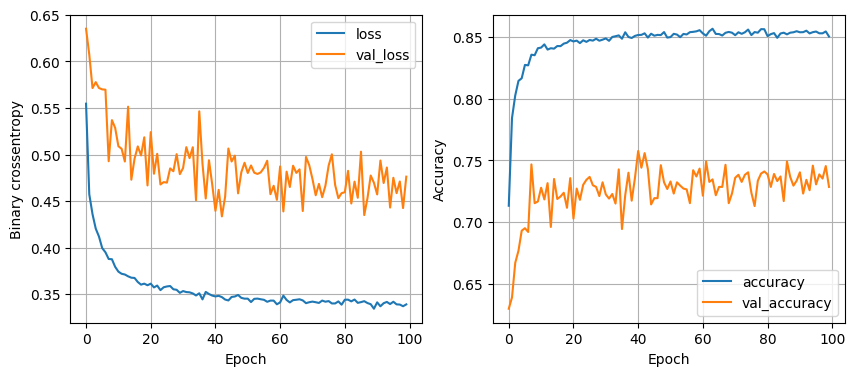

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.8654 - loss: 0.3232
16 nodes, dropout_rate 0.2, lr 0.001, batch_size 64


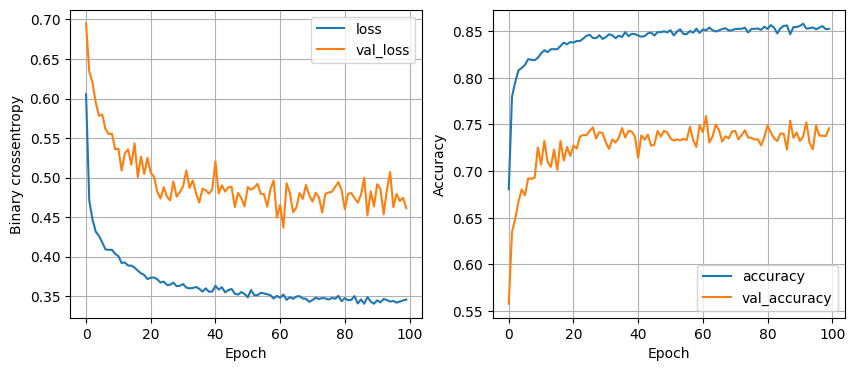

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.8704 - loss: 0.3255
16 nodes, dropout_rate 0.2, lr 0.001, batch_size 128


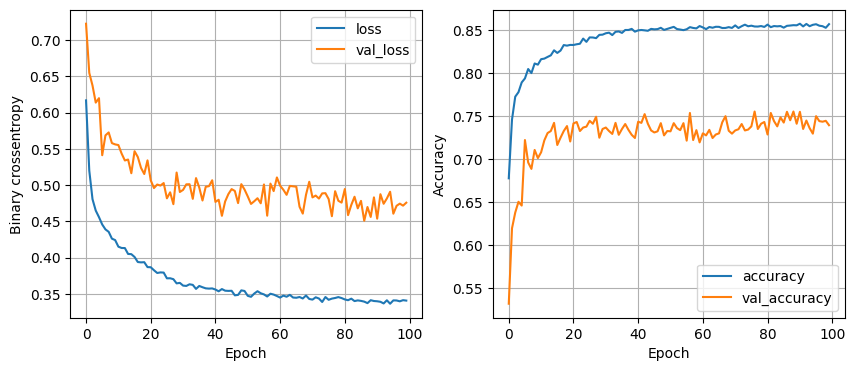

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.8641 - loss: 0.3238
32 nodes, dropout_rate 0, lr 0.1, batch_size 32


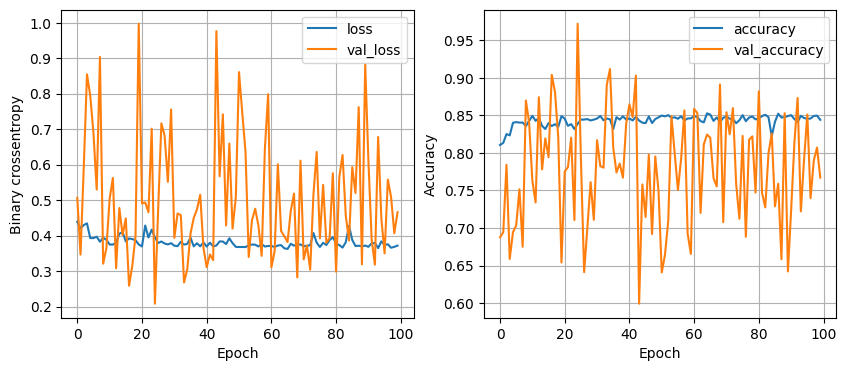

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.8509 - loss: 0.3611
32 nodes, dropout_rate 0, lr 0.1, batch_size 64


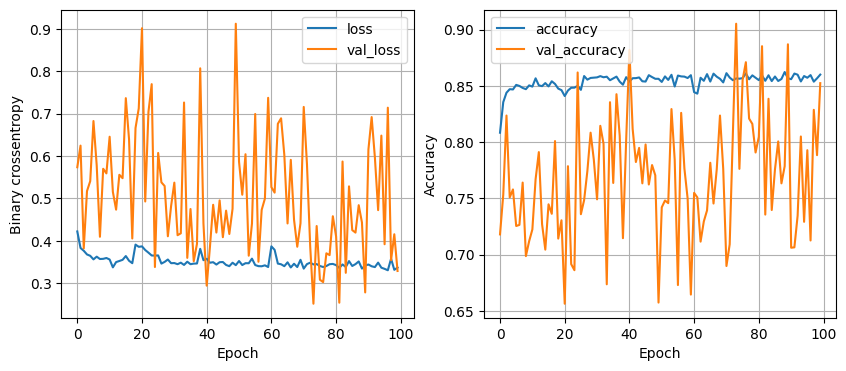

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.8441 - loss: 0.3623
32 nodes, dropout_rate 0, lr 0.1, batch_size 128


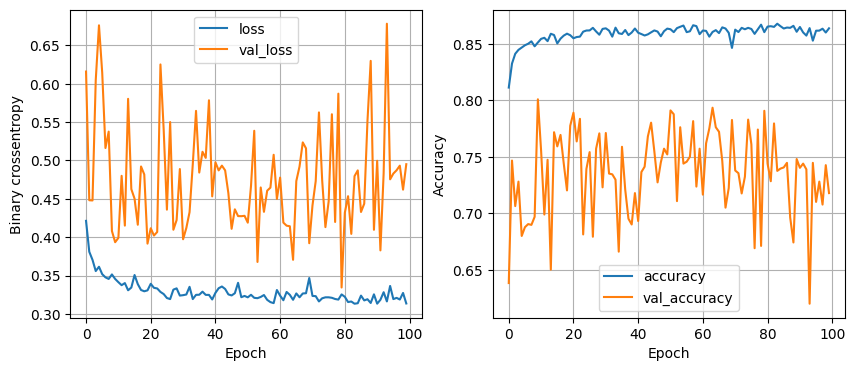

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.8633 - loss: 0.3235
32 nodes, dropout_rate 0, lr 0.005, batch_size 32


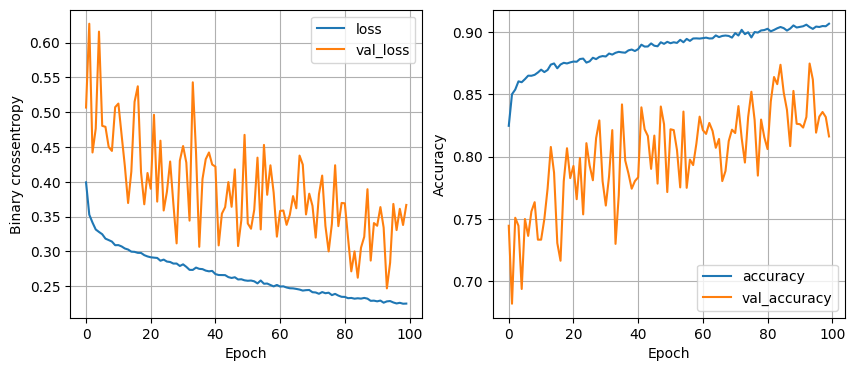

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.8661 - loss: 0.3747
32 nodes, dropout_rate 0, lr 0.005, batch_size 64


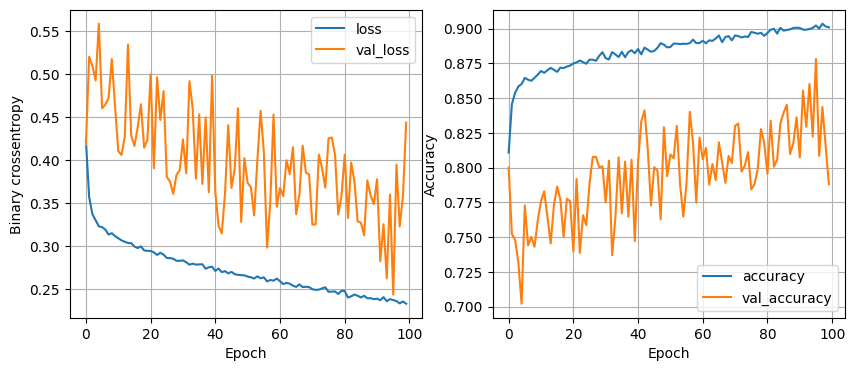

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.8718 - loss: 0.3654
32 nodes, dropout_rate 0, lr 0.005, batch_size 128


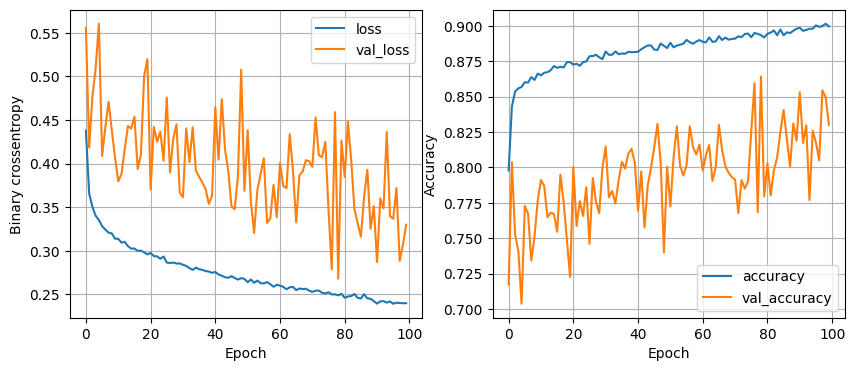

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.8707 - loss: 0.3492
32 nodes, dropout_rate 0, lr 0.001, batch_size 32


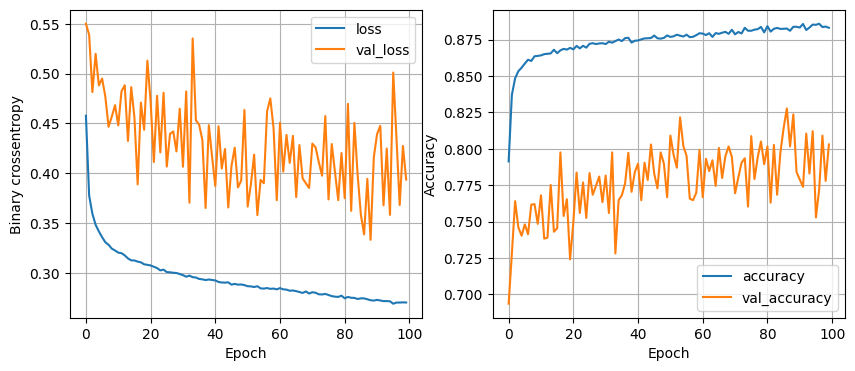

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.8719 - loss: 0.3207
32 nodes, dropout_rate 0, lr 0.001, batch_size 64


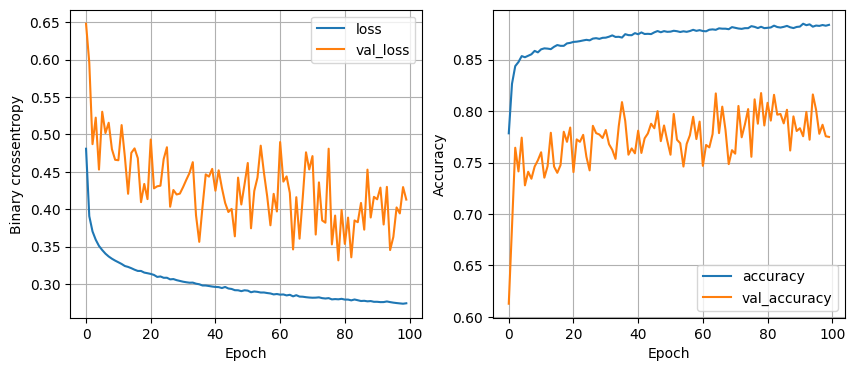

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.8713 - loss: 0.3107
32 nodes, dropout_rate 0, lr 0.001, batch_size 128


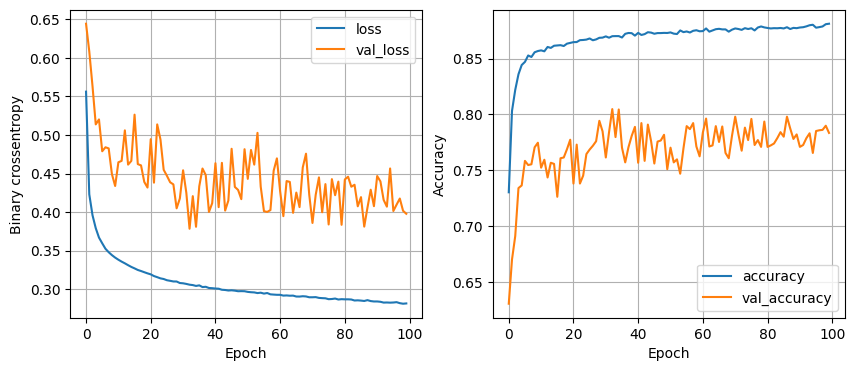

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.8693 - loss: 0.3118
32 nodes, dropout_rate 0.2, lr 0.1, batch_size 32


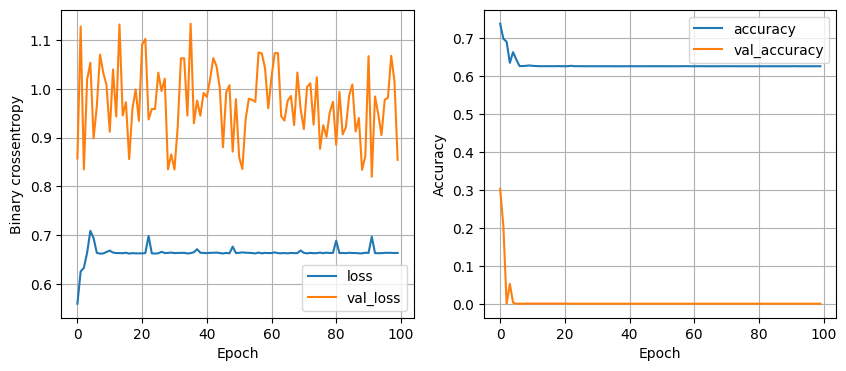

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.6530 - loss: 0.6584
32 nodes, dropout_rate 0.2, lr 0.1, batch_size 64


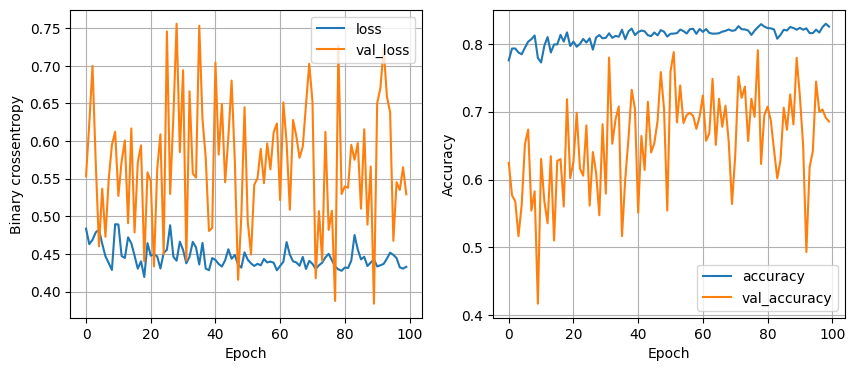

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.8622 - loss: 0.3865
32 nodes, dropout_rate 0.2, lr 0.1, batch_size 128


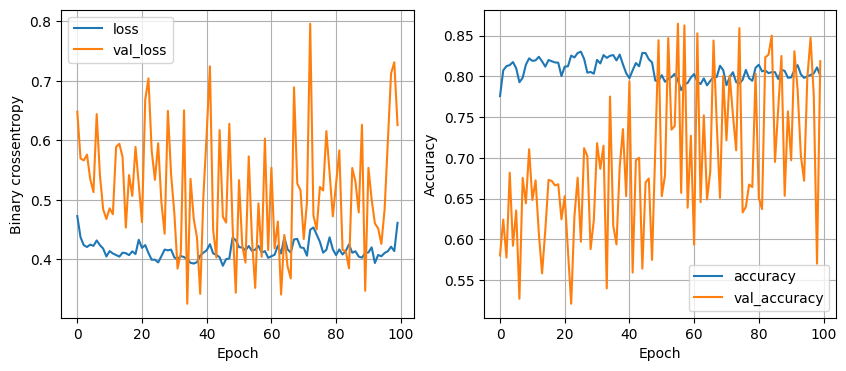

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.8299 - loss: 0.3881
32 nodes, dropout_rate 0.2, lr 0.005, batch_size 32


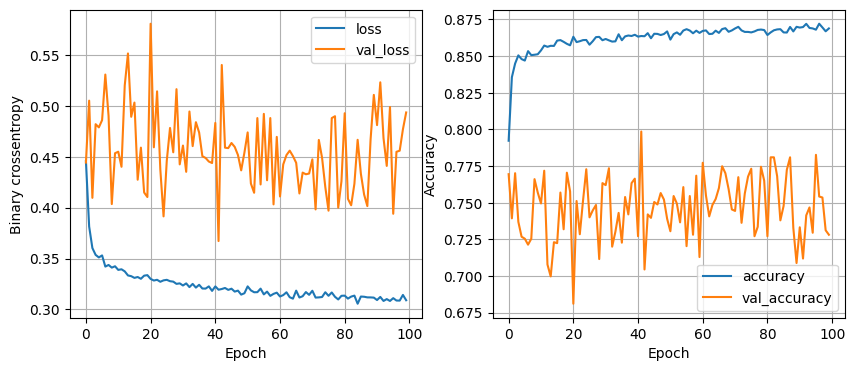

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.8711 - loss: 0.3145
32 nodes, dropout_rate 0.2, lr 0.005, batch_size 64


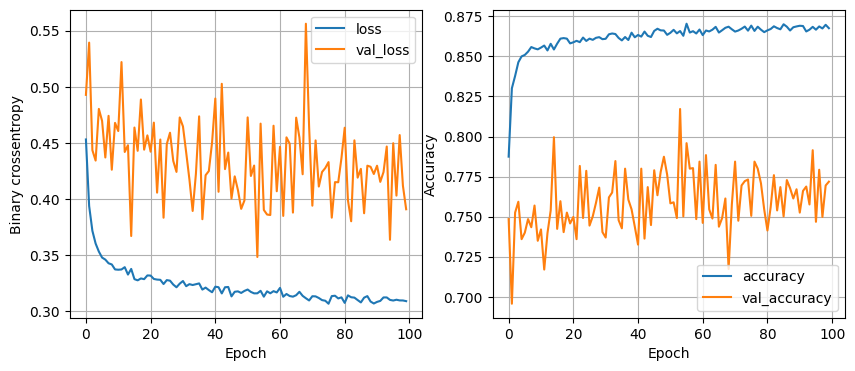

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.8716 - loss: 0.3062
32 nodes, dropout_rate 0.2, lr 0.005, batch_size 128


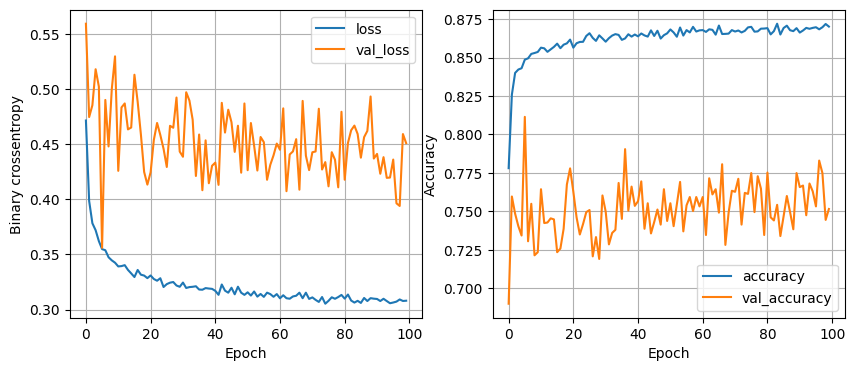

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.8708 - loss: 0.3012
32 nodes, dropout_rate 0.2, lr 0.001, batch_size 32


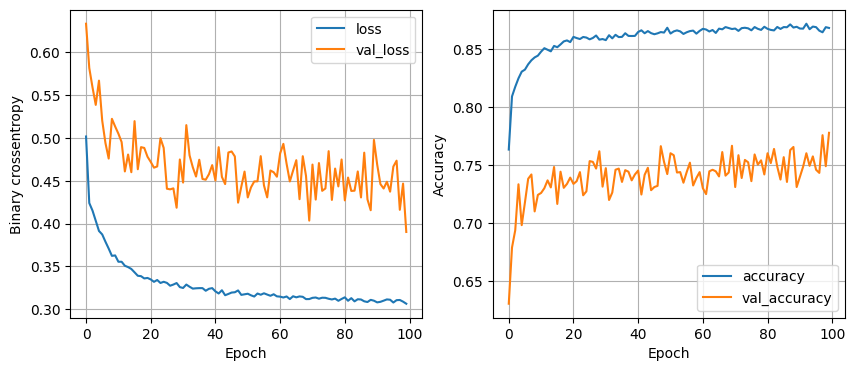

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.8737 - loss: 0.3086
32 nodes, dropout_rate 0.2, lr 0.001, batch_size 64


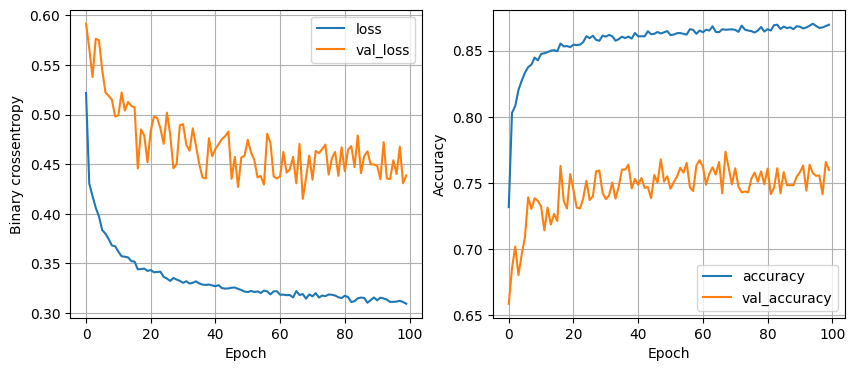

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8740 - loss: 0.3032
32 nodes, dropout_rate 0.2, lr 0.001, batch_size 128


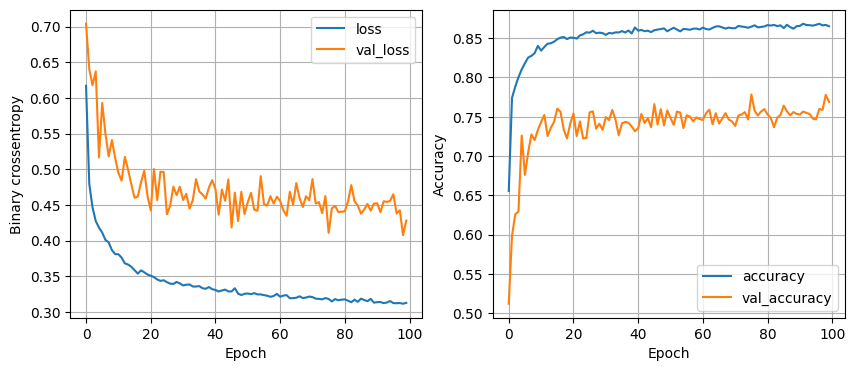

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.8780 - loss: 0.3001
64 nodes, dropout_rate 0, lr 0.1, batch_size 32


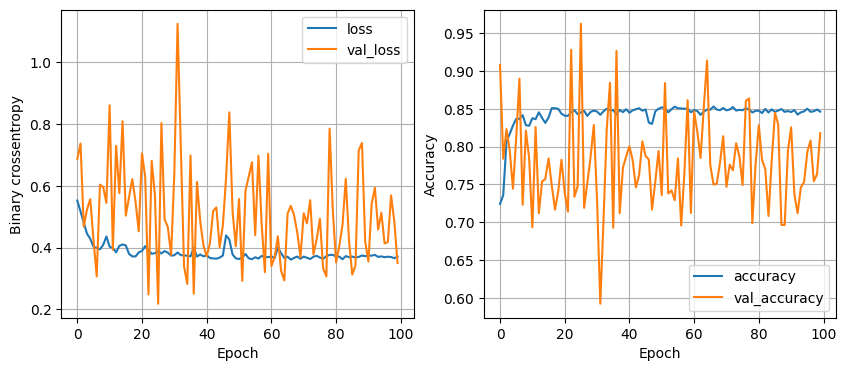

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.8246 - loss: 0.4175
64 nodes, dropout_rate 0, lr 0.1, batch_size 64


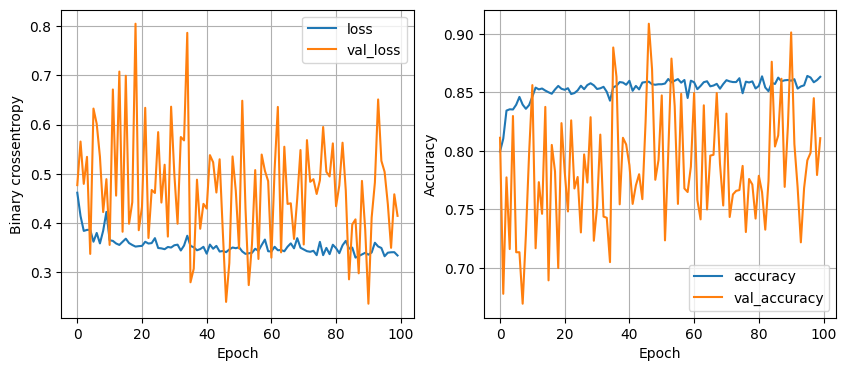

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8639 - loss: 0.3290
64 nodes, dropout_rate 0, lr 0.1, batch_size 128


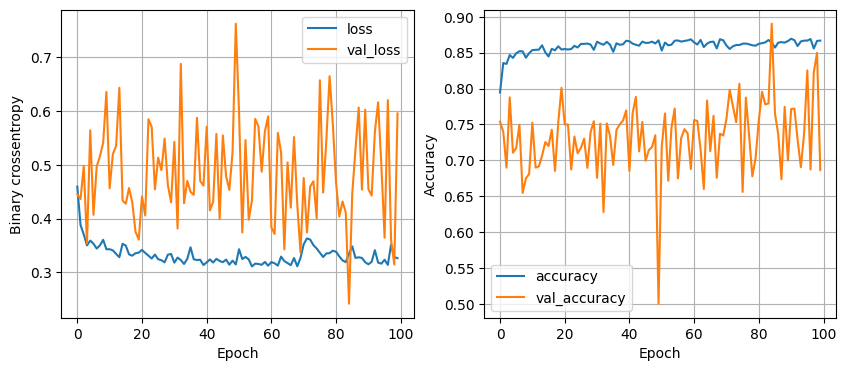

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.8744 - loss: 0.3298
64 nodes, dropout_rate 0, lr 0.005, batch_size 32


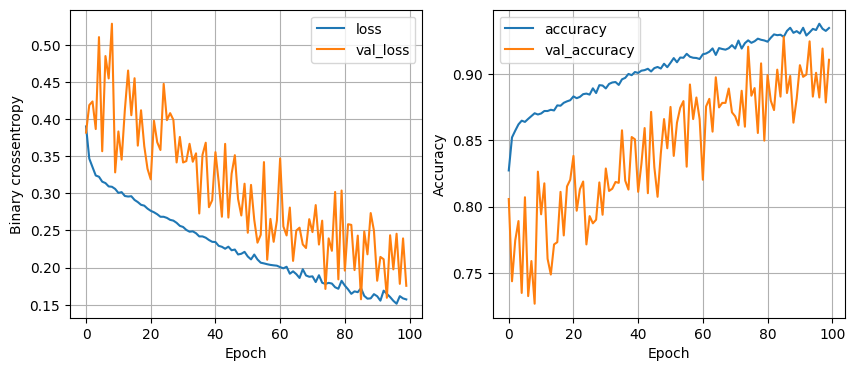

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.8529 - loss: 0.5944
64 nodes, dropout_rate 0, lr 0.005, batch_size 64


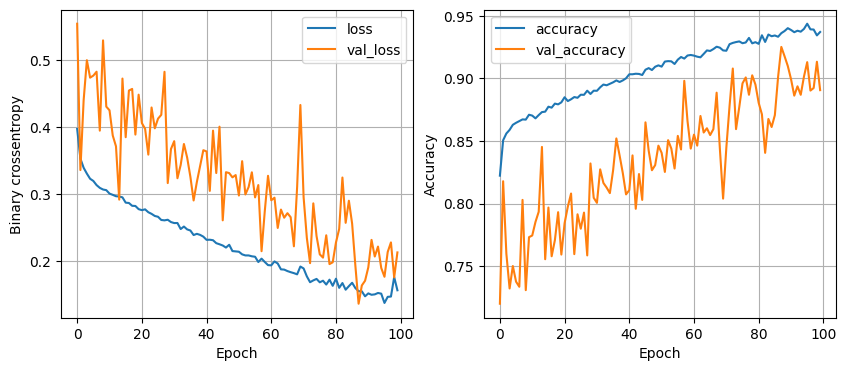

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.8546 - loss: 0.5639
64 nodes, dropout_rate 0, lr 0.005, batch_size 128


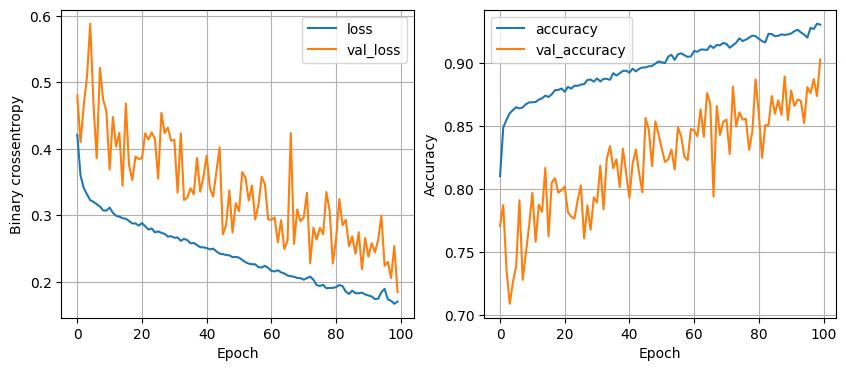

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.8548 - loss: 0.5168
64 nodes, dropout_rate 0, lr 0.001, batch_size 32


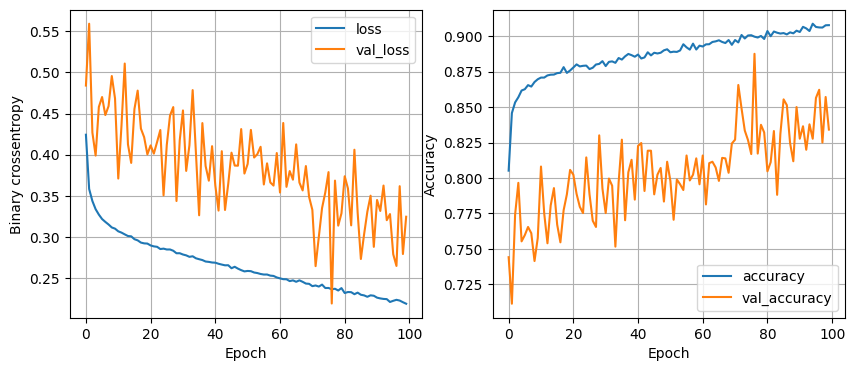

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.8707 - loss: 0.3506
64 nodes, dropout_rate 0, lr 0.001, batch_size 64


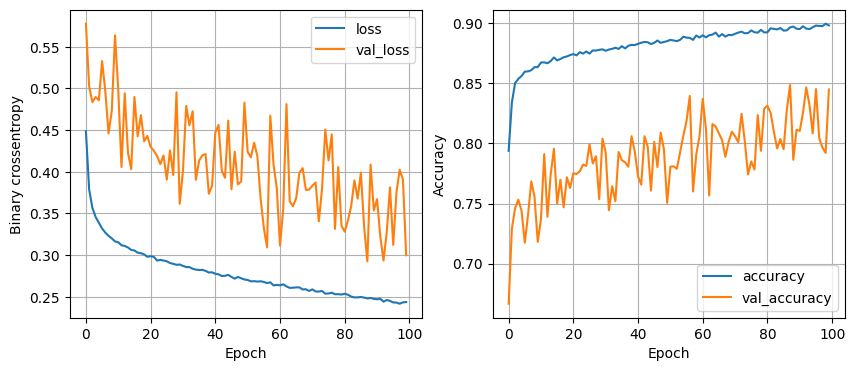

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.8720 - loss: 0.3323
64 nodes, dropout_rate 0, lr 0.001, batch_size 128


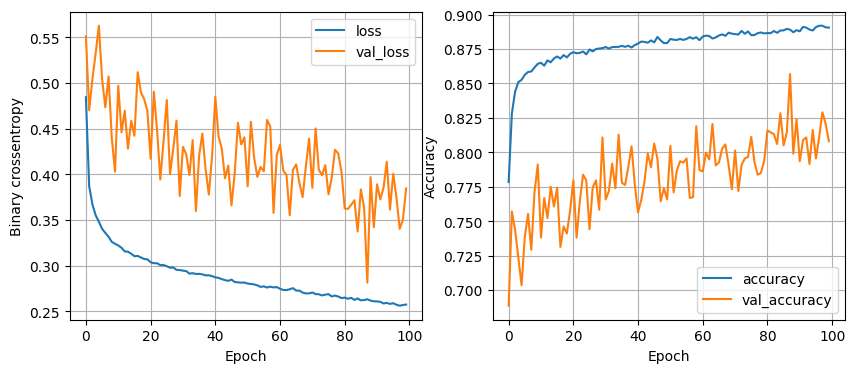

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.8724 - loss: 0.3245
64 nodes, dropout_rate 0.2, lr 0.1, batch_size 32


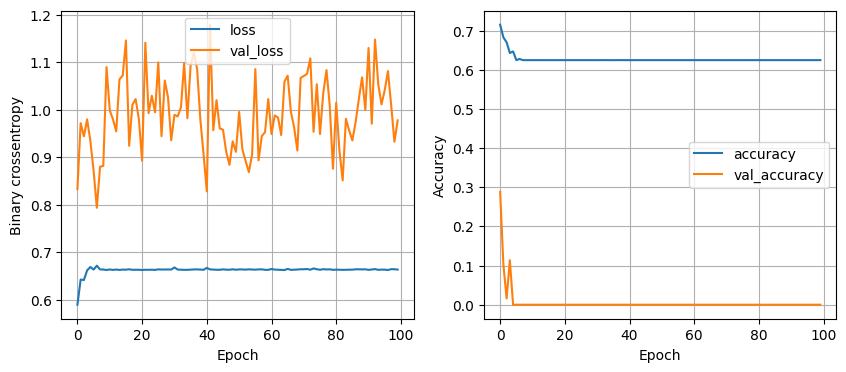

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.6530 - loss: 0.6474
64 nodes, dropout_rate 0.2, lr 0.1, batch_size 64


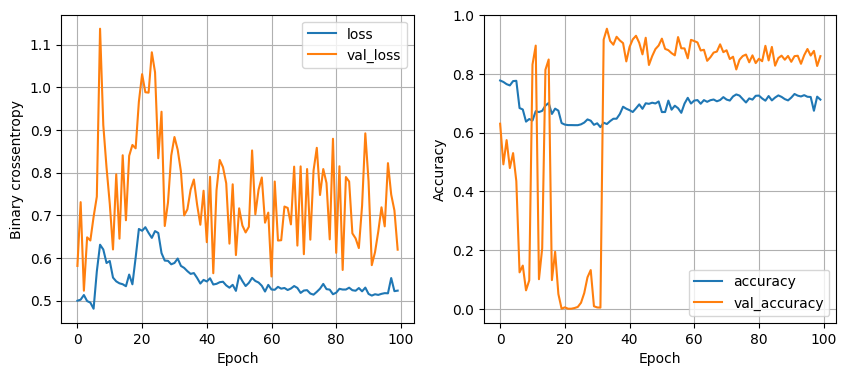

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.7866 - loss: 0.4992
64 nodes, dropout_rate 0.2, lr 0.1, batch_size 128


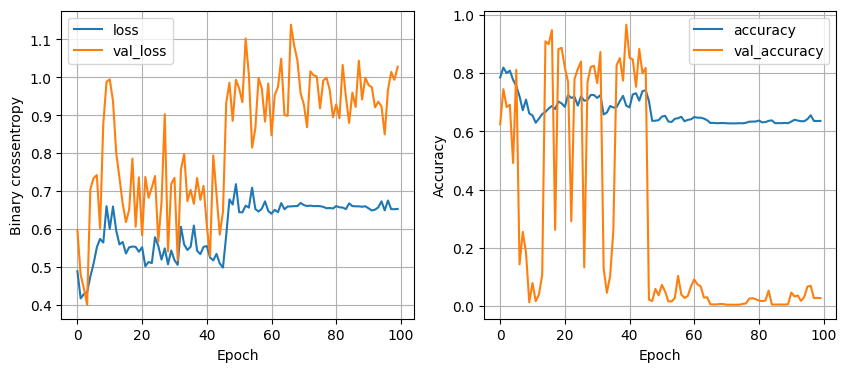

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.6627 - loss: 0.6354
64 nodes, dropout_rate 0.2, lr 0.005, batch_size 32


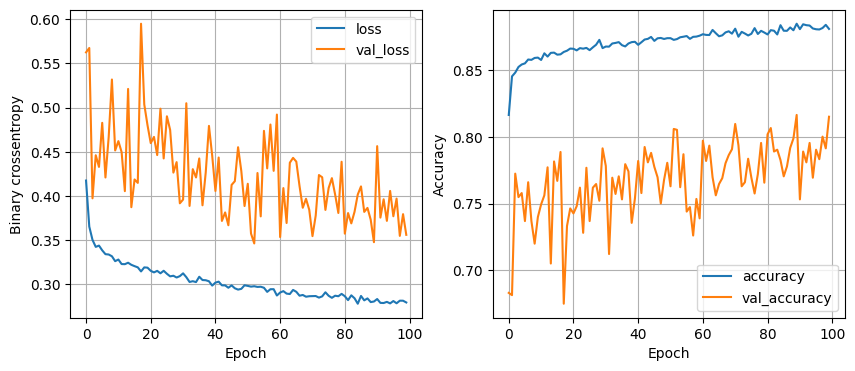

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.8715 - loss: 0.3092
64 nodes, dropout_rate 0.2, lr 0.005, batch_size 64


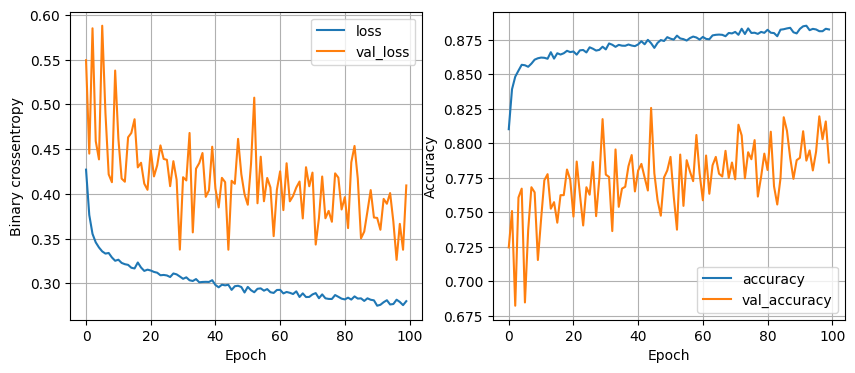

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.8747 - loss: 0.3035
64 nodes, dropout_rate 0.2, lr 0.005, batch_size 128


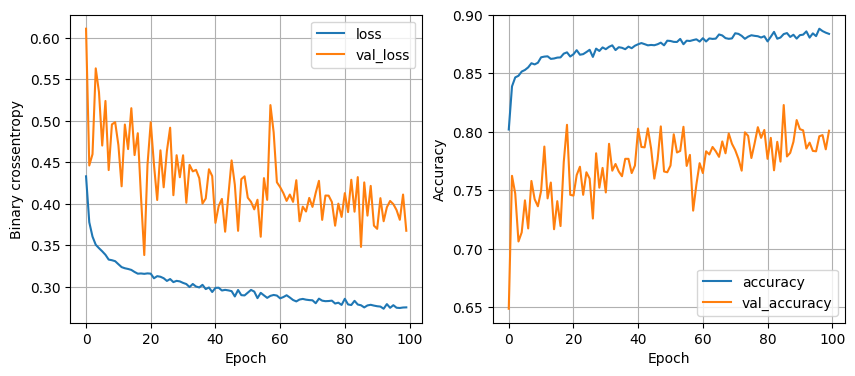

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.8759 - loss: 0.3014
64 nodes, dropout_rate 0.2, lr 0.001, batch_size 32


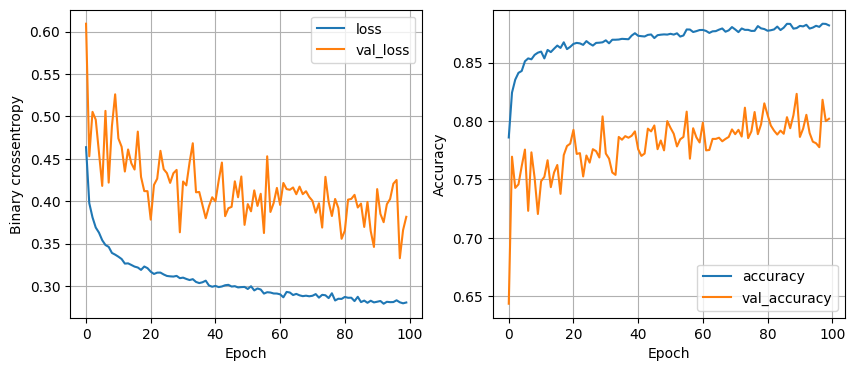

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.8859 - loss: 0.2904
64 nodes, dropout_rate 0.2, lr 0.001, batch_size 64


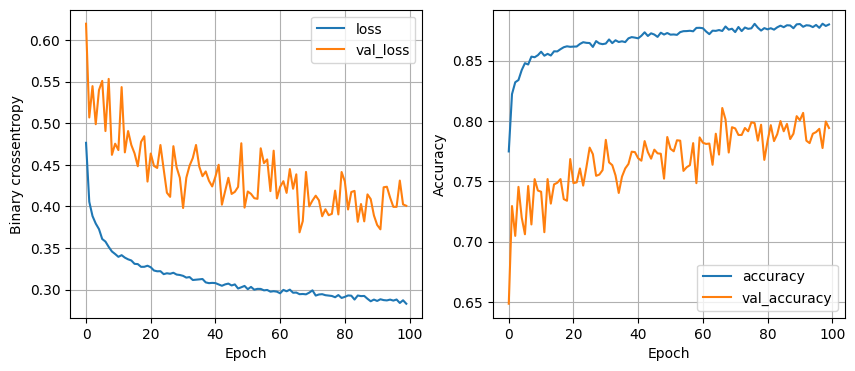

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.8787 - loss: 0.2985
64 nodes, dropout_rate 0.2, lr 0.001, batch_size 128


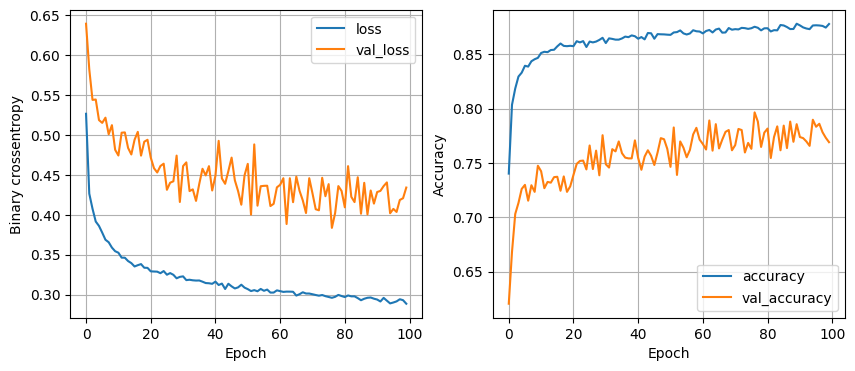

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.8794 - loss: 0.2964


In [86]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_rate in [0, 0.2]:
        for lr in [0.1, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout_rate {dropout_rate}, lr {lr}, batch_size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_rate, lr, batch_size, epochs)
                plot_history(history)

                # Evaluate the model and extract validation loss

                val_loss = model.evaluate(X_valid, y_valid)
                if isinstance(val_loss, list):  # If multiple metrics, take the first as loss
                    val_loss = val_loss[0]

                #Capture the least loss model
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model


In [90]:
y_pred = least_loss_model.predict(X_test)
# type casting y_pred as int to obtain 1s and 0s for y_pred; reshaping into a column
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y_pred

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step


array([0, 0, 1, ..., 1, 0, 0])

In [1]:
# Print Classification Report
print(classification_report(y_test, y_pred))

NameError: name 'classification_report' is not defined

## Overview of the Supervised Learning -> Classification
### Goal: To use different classification algorithms to evaluate the best performing model to predict if the target variable is of the class 'gamma' or 'Hadron'.
- Models Used:
    - k-Nearest Neighbors
    - Naive-Bayes
    - Logistic Regression
    - Support Vector Machines (SVM)
    - Neural Network

Overall, for this dataset, the neural network performed the best with an accuracy of 88% and f1-score of classes 0 and 1 as 83% and 91% respectively. Following it closely, the SVM model performed similarly with an accuracy of 86% and f1-scores of 81% and 90% respectively.